# Auto-sklearn Regression for Real Dataset
We will compare the results of LinearRegressor with those given by the model developed through auto-sklearn

In [1]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,346 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

***Note:-***
Need to '*Restart runtime*' before proceed to next statement. 


In [2]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.14.7


Further information about installation in: https://automl.github.io/auto-sklearn/master/installation.html

In [3]:
from sklearn.model_selection import train_test_split

## Regression:

## Datasource: 
https://www.kaggle.com/mirichoi0218/insurance

The dataset has 6 features and a numerical label called charges, which is our target

First, we will predict a charge using traditional Linear Regression model and then do the same with  AutoSklearnRegressor

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/insurance.csv'

--2022-09-08 07:13:51--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54289 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.003s  

2022-09-08 07:13:51 (16.0 MB/s) - ‘insurance.csv’ saved [54289/54289]



In [6]:
df2=pd.read_csv('/content/insurance.csv')

In [7]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The Feature Engineering step will be done quickly as it is not the scope of the current project:

In [8]:
df2['sex']=df2['sex'].replace('male',1).replace('female',0)

In [9]:
df2['smoker']=df2['smoker'].replace('yes',1).replace('no',0)

In [10]:
df2 = pd.get_dummies(df2, columns=['region'], drop_first=True) #To avoid multicollinearity

In [11]:
df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
df_num=df2[['age','bmi','children']]   #Numerical columns

In [14]:
pf = PolynomialFeatures(degree=2, include_bias=False)
df2_pf = pf.fit_transform(df_num)

In [15]:
df2_pf.shape

(1338, 9)

In [16]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(df_num.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df2_pf, columns = target_feature_names, index=df2.index)

In [17]:
output_df.head()

,age^1,bmi^1,children^1,age^2,age^1xbmi^1,age^1xchildren^1,bmi^2,bmi^1xchildren^1,children^2
0,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0
1,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0
2,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0
3,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0
4,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0


In [18]:
df2.drop(['age','bmi','children'], axis=1, inplace=True)

In [19]:
df2 = pd.concat((df2, output_df), axis=1)

As the label is skewed, we will apply logarithmic transformations

In [20]:
label=np.log(df2['charges'])

In [21]:
df2.drop(['charges'], axis=1, inplace=True)

In [22]:
df2

,sex,smoker,region_northwest,region_southeast,region_southwest,age^1,bmi^1,children^1,age^2,age^1xbmi^1,age^1xchildren^1,bmi^2,bmi^1xchildren^1,children^2
0,0,1,0,0,1,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0
1,1,0,0,1,0,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0
2,1,0,0,1,0,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0
3,1,0,1,0,0,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0
4,1,0,1,0,0,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,0,1,0,0,50.0,30.970,3.0,2500.0,1548.500,150.0,959.140900,92.91,9.0
1334,0,0,0,0,0,18.0,31.920,0.0,324.0,574.560,0.0,1018.886400,0.00,0.0
1335,0,0,0,1,0,18.0,36.850,0.0,324.0,663.300,0.0,1357.922500,0.00,0.0
1336,0,0,0,0,1,21.0,25.800,0.0,441.0,541.800,0.0,665.640000,0.00,0.0


Function for printing error metrics

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def error_metrics(y_pred,y_val):
  print('MSE: ',mean_squared_error(y_pred,y_val))
  print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_val)))
  print('Coefficient of determination: ',r2_score(y_pred,y_val))

In [24]:
X_train, X_val, label_train, label_val = train_test_split(df2, label, test_size=0.15, random_state=42)

In [25]:
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((1137, 14), (1137,), (201, 14), (201,))

In [26]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

## Linear Regressor model without regularization

In [27]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train_scaled, label_train)

y_pred = linearRegression.predict(X_val_scaled)

error_metrics(y_pred,label_val)

MSE:  0.1725732138508936
RMSE:  0.4154193229146829
Coefficient of determination:  0.7672600627397954


## Regression with Autosklearn:

In [28]:
from autosklearn.regression import AutoSklearnRegressor

In [29]:
model_auto_reg = AutoSklearnRegressor(time_left_for_this_task=4*60, 
                                   per_run_time_limit=30, 
                                   n_jobs=-1)
model_auto_reg.fit(X_train_scaled,label_train)
print(model_auto_reg.sprint_statistics())

y_pred_auto = model_auto_reg.predict(X_val_scaled)

auto-sklearn results:
  Dataset name: cb450bcc-2f45-11ed-8188-0242ac1c0002
  Metric: r2
  Best validation score: 0.784812
  Number of target algorithm runs: 32
  Number of successful target algorithm runs: 21
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 2



Obviously the metric used is different than in classification, this corresponds to R2-score and the amount of models succesfully trained were 37, from which the best one got 79% in sub-validation set.

In [30]:
model_auto_reg.show_models()

{6: {'model_id': 6,
  'rank': 1,
  'cost': 0.2151879513281142,
  'ensemble_weight': 0.18,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7ff4a1288b10>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7ff4a4819f50>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x7ff4a0d9f350>,
  'sklearn_regressor': ExtraTreesRegressor(criterion='friedman_mse', max_features=0.8276036843429629,
                      min_samples_leaf=5, min_samples_split=13, n_estimators=512,
                      n_jobs=1, random_state=1, warm_start=True)},
 3: {'model_id': 3,
  'rank': 2,
  'cost': 0.21537484115006855,
  'ensemble_weight': 0.16,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7ff4a0d9f4d0>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 

In [31]:
error_metrics(y_pred_auto,label_val)

MSE:  0.11669354873035388
RMSE:  0.3416043745773082
Coefficient of determination:  0.8399557215310833


Coefficient of determination is better here as compared to a simple linear regressor

### Actual v/s Predicted values

In [32]:
df11=pd.DataFrame(np.exp(label_val).values, columns=['actual charge'])

In [33]:
df22=pd.DataFrame(np.exp(y_pred_auto), columns=['predicted charge'])

In [34]:
df_concat = pd.concat((df11, df22), axis=1)
df_concat

,actual charge,predicted charge
0,9095.06825,9730.330072
1,5272.17580,5640.369375
2,29330.98315,30322.181767
3,9301.89355,10159.599589
4,33750.29180,27686.957449
...,...,...
196,2709.11190,2937.586282
197,12096.65120,13630.554576
198,2198.18985,2949.634174
199,8932.08400,10293.450237


Text(0.5, 1.0, 'Regression plot of predicted v/s actual charges \n (scale - Currency)')

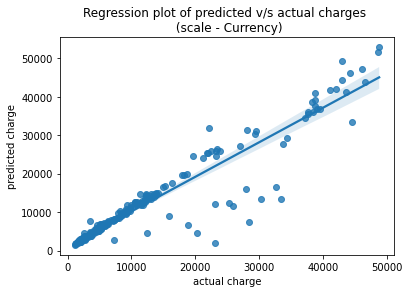

In [35]:
sns.regplot(y='predicted charge', x='actual charge', data=df_concat)
plt.title('Regression plot of predicted v/s actual charges \n (scale - Currency)')